In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


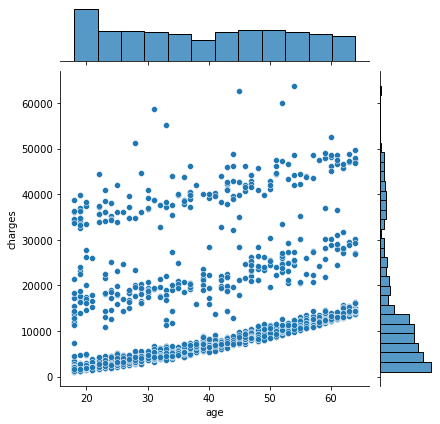

In [6]:
sns.jointplot(x='age', y='charges', data=df)

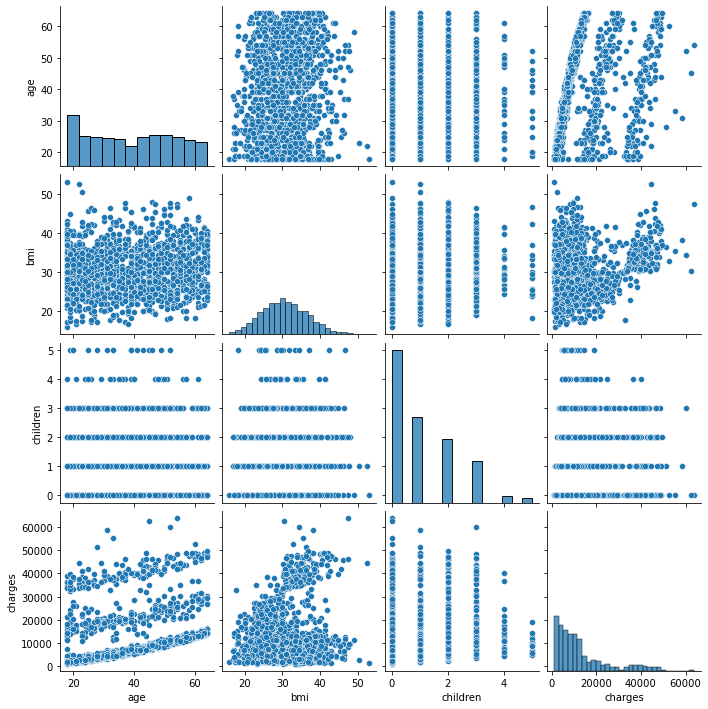

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

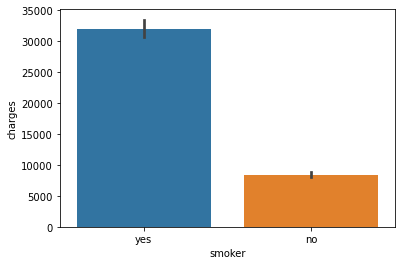

In [8]:
sns.barplot(x='smoker', y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

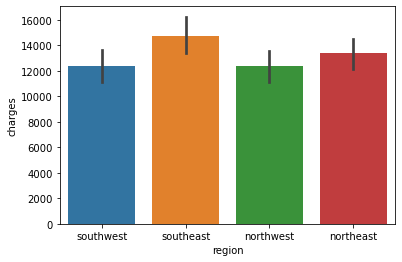

In [9]:
sns.barplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

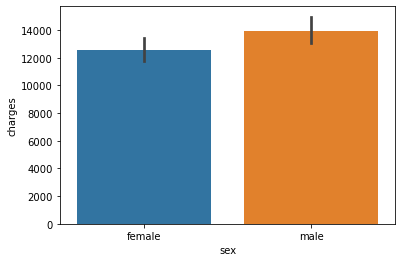

In [10]:
sns.barplot(x='sex', y='charges', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

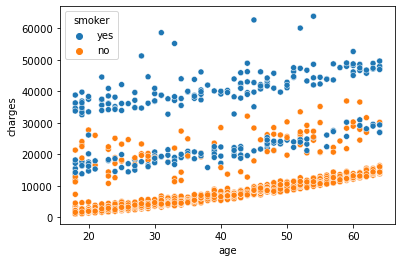

In [11]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

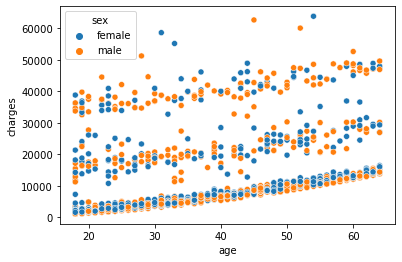

In [12]:
sns.scatterplot(x='age', y='charges', hue='sex', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

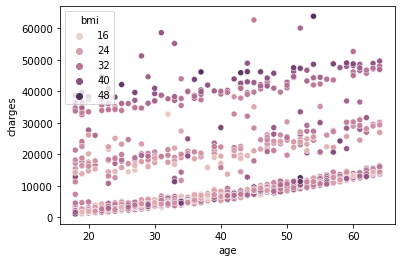

In [13]:
sns.scatterplot(x='age', y='charges', hue='bmi', data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

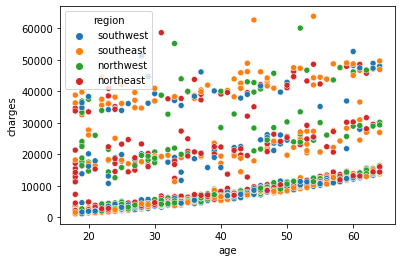

In [14]:
sns.scatterplot(x='age', y='charges', hue='region', data=df)

In [15]:
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3})

In [16]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.005212,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.016121,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.261829,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.019257,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.053930,0.787251
region,0.005212,-0.016121,-0.261829,0.019257,-0.053930,1.000000,-0.056993
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.056993,1.000000


In [38]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [42]:
X = df.iloc[:, 4:5].values
y = df.iloc[:, 6].values

In [43]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1))

In [44]:
model = svm.SVR()
model.fit(X,y)

/Users/joshuamin/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [46]:
prediction = model.predict([[1]])
prediction

array([0.9295202])

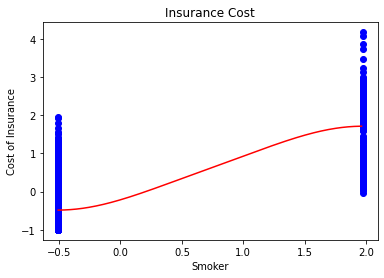

In [48]:
X_grid = np.arange(np.min(X), np.max(X), .01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='blue')
plt.plot(X_grid, model.predict(X_grid), color='red')
plt.title("Insurance Cost")
plt.xlabel("Smoker")
plt.ylabel("Cost of Insurance")
plt.show()

In [52]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, 6].values

In [54]:
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1))
model = svm.SVR()
model.fit(X,y)

/Users/joshuamin/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

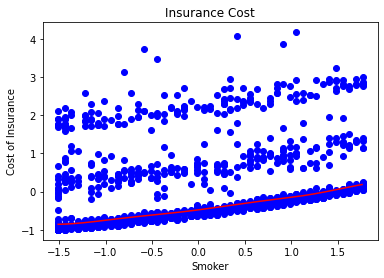

In [55]:
X_grid = np.arange(np.min(X), np.max(X), .01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='blue')
plt.plot(X_grid, model.predict(X_grid), color='red')
plt.title("Insurance Cost")
plt.xlabel("Smoker")
plt.ylabel("Cost of Insurance")
plt.show()